# Predicting Heart Disease using Machine Learning Model

We are going to take following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score , f1_score, RocCurveDisplay


In [4]:
df = pd.read_csv('heart-disease.csv')

In [5]:
df.shape

(303, 14)

# Data Exploration (Exploratory Data Analysis)

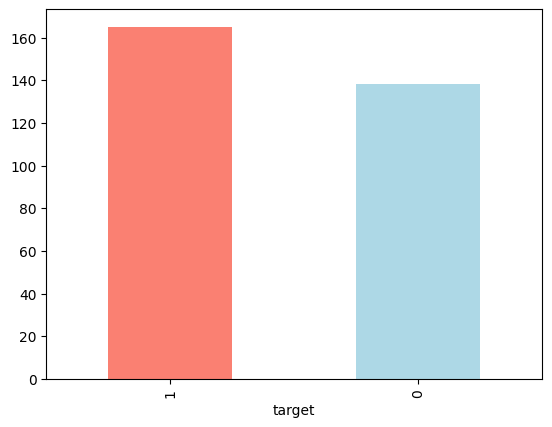

In [6]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);